<a href="https://colab.research.google.com/github/xaviermurilo/xaviermurilo/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [4]:
df = pd.read_csv('cost_revenue_dirty.csv')

In [5]:
df.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3510,1390,11/13/2009,The Fantastic Mr. Fox,"$40,000,000","$47,085,064","$21,002,919"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [7]:
df.shape

(5391, 6)

In [8]:
df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
808,1034,10/3/1995,Outbreak,"$50,000,000","$67,823,573","$67,823,573"


In [11]:

coluns_to_clean = ['USD_Production_Budget','USD_Worldwide_Gross', 'USD_Domestic_Gross']
caracters_to_clean = ['$', ',']

for col in coluns_to_clean:
  for carac in caracters_to_clean:
    df[col] = df[col].astype(str).str.replace(carac,'')
  
  df[col] = pd.to_numeric(df[col])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [12]:
df.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4402,3266,6/12/2013,Inside Llewyn Davis,11000000,32943247,13248209


In [13]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [14]:
df.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [15]:
df.isna().values.any()

False

In [16]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [17]:
df.USD_Worldwide_Gross.mean()

88855421.96271564

In [18]:
df.USD_Worldwide_Gross.min() 

0

In [19]:
df.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4197,5225,2012-07-20,Burn,225000,1109276,1109276


In [20]:
df.USD_Production_Budget.max()

425000000

In [21]:
df.USD_Worldwide_Gross.max()

2783918982

In [22]:
df[df.USD_Production_Budget == df.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [23]:
df[df.USD_Production_Budget == df.USD_Production_Budget.min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [24]:
df[df.USD_Domestic_Gross == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [25]:

df[df.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget',ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


In [26]:
df[df.USD_Worldwide_Gross == 0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [27]:
df[df.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget',ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [28]:
df.loc[(df.USD_Worldwide_Gross != 0) & (df.USD_Domestic_Gross ==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [29]:
df2 = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross !=0')
df2

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [30]:
day = pd.Timestamp('2018-05-01')
future_releases = df[df.Release_Date >= day]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [31]:
data_clean = df.drop(future_releases.index)

In [32]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]

In [33]:
(len(money_losing)/len(data_clean))*100

37.27711738484398

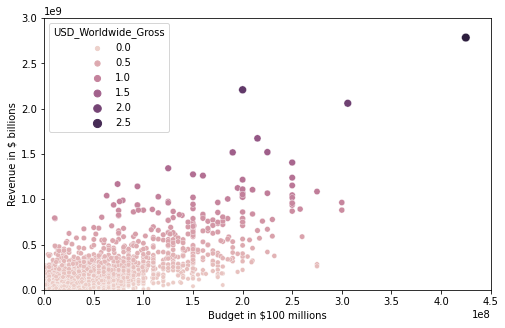

In [34]:
plt.figure(figsize = (8,5))
ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross' )

ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      ylabel='Revenue in $ billions',
      xlabel='Budget in $100 millions')
plt.show()

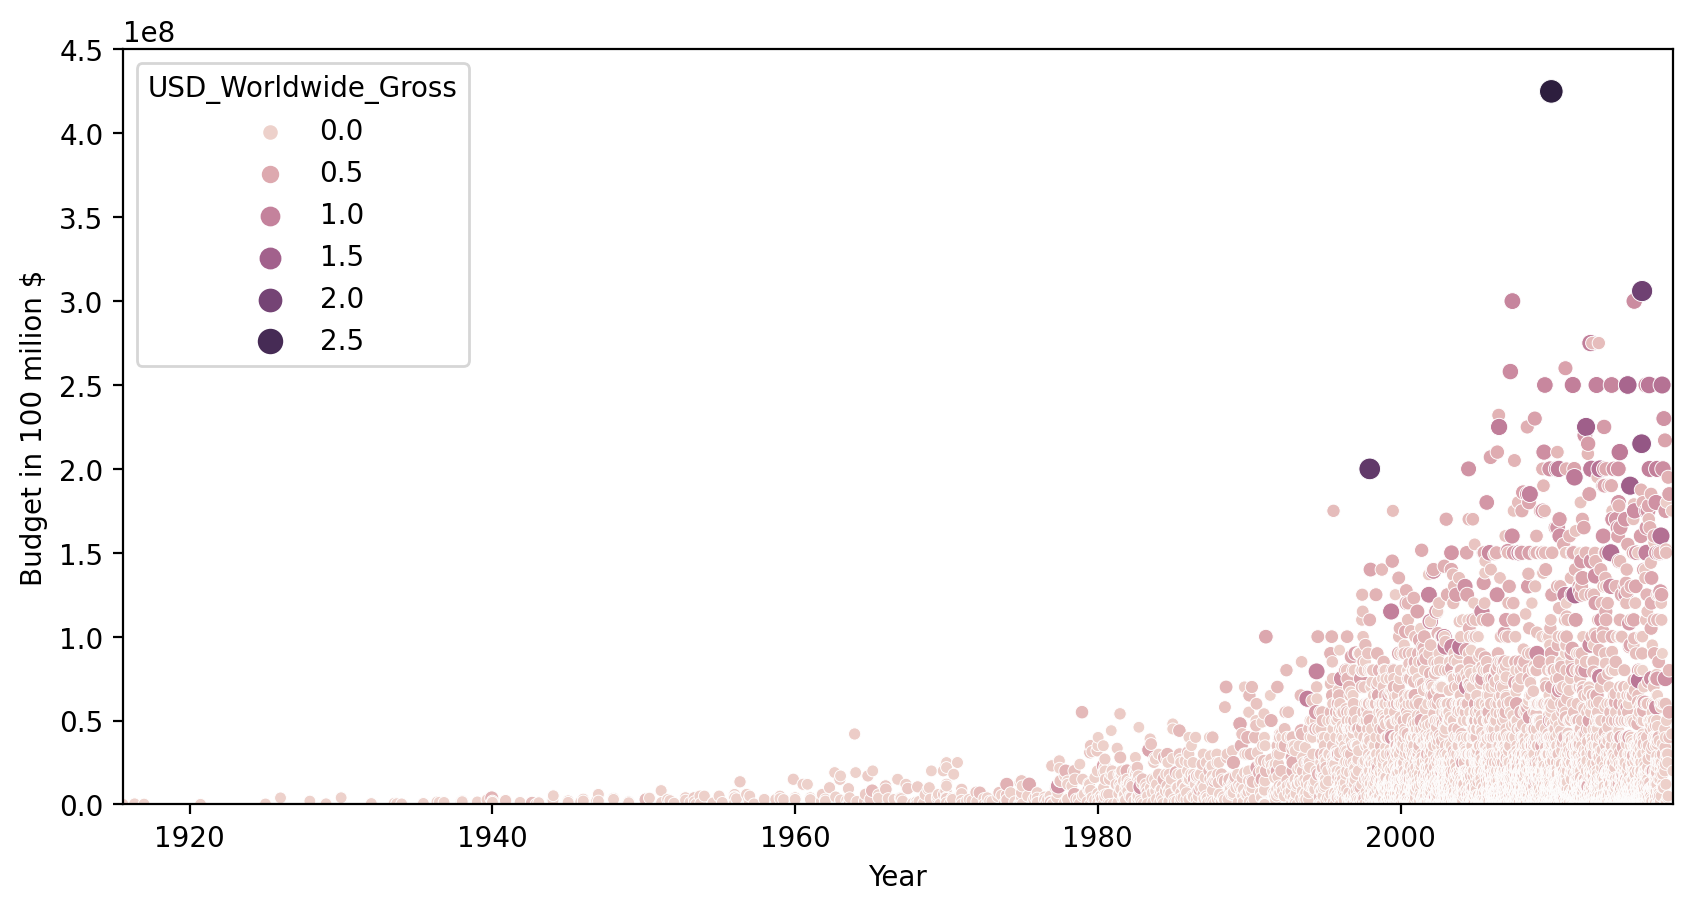

In [35]:
plt.figure(figsize=(10,5), dpi=200)
ax2 = sns.scatterplot(data=data_clean,
                      x='Release_Date',
                      y='USD_Production_Budget',
                      hue='USD_Worldwide_Gross',
                      size='USD_Worldwide_Gross')

ax2.set(xlim= (data_clean.Release_Date.min(),data_clean.Release_Date.max()),
       ylim= (0, 450000000),
       xlabel= 'Year',
       ylabel= 'Budget in 100 milion $')
plt.show()


In [36]:
 DatetimeIndex = pd.DatetimeIndex(data_clean.Release_Date)

In [37]:
years = DatetimeIndex.year
dacades = (years // 10) * 10 
data_clean['Decades'] = dacades


In [38]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [39]:
old_films = data_clean[data_clean.Decades < 1970 ]
new_films = data_clean[data_clean.Decades >= 1970]

In [40]:
len(old_films)

153

In [41]:
len(new_films)

5231

In [42]:
old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [43]:
old_films.query('USD_Production_Budget == USD_Production_Budget.max()')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


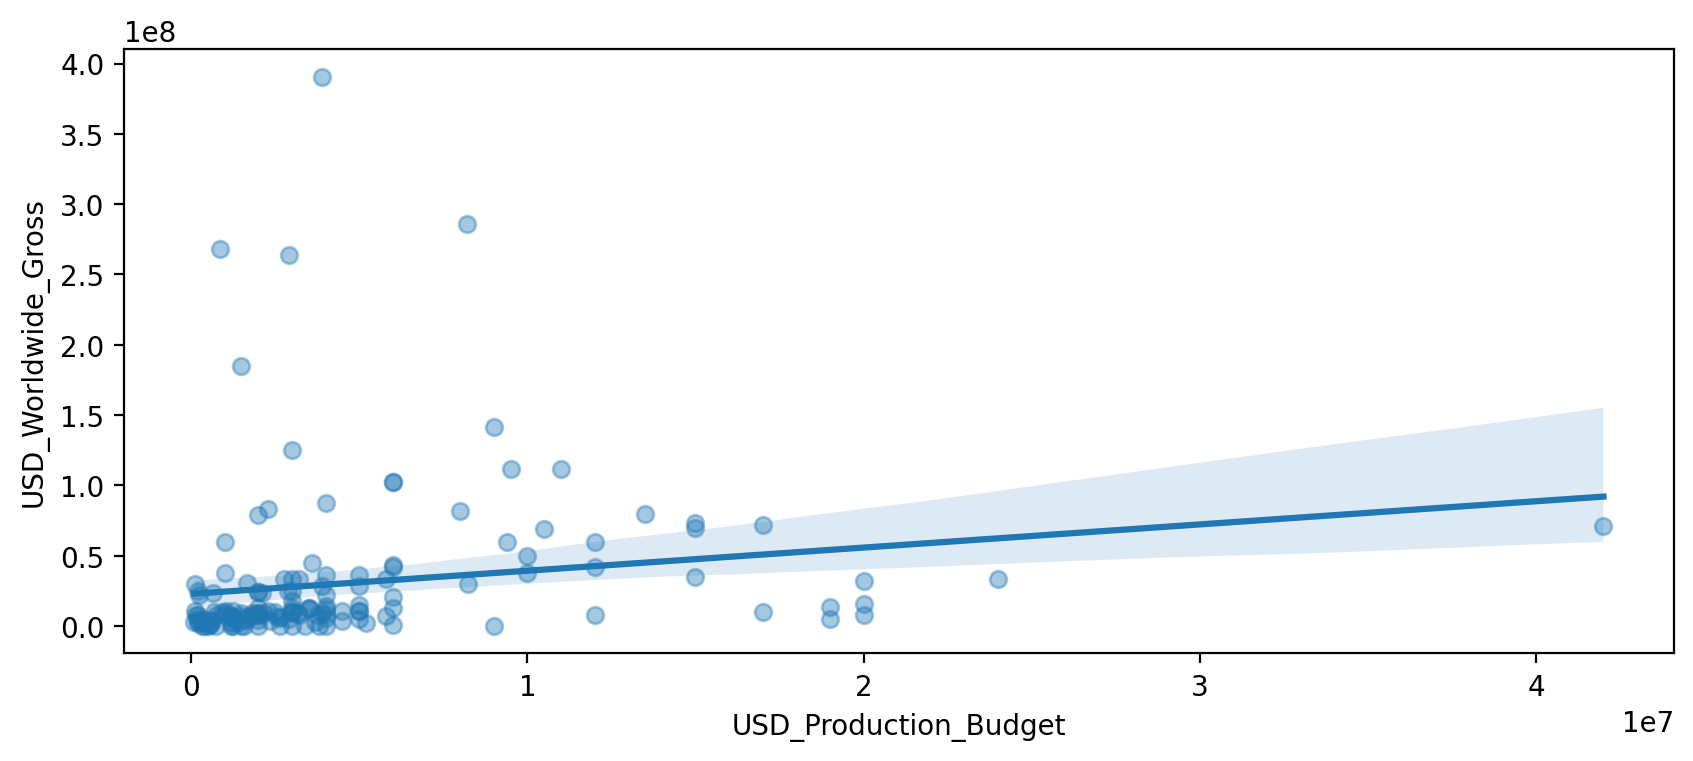

In [47]:
plt.figure(figsize=(10,4), dpi=200)
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4})

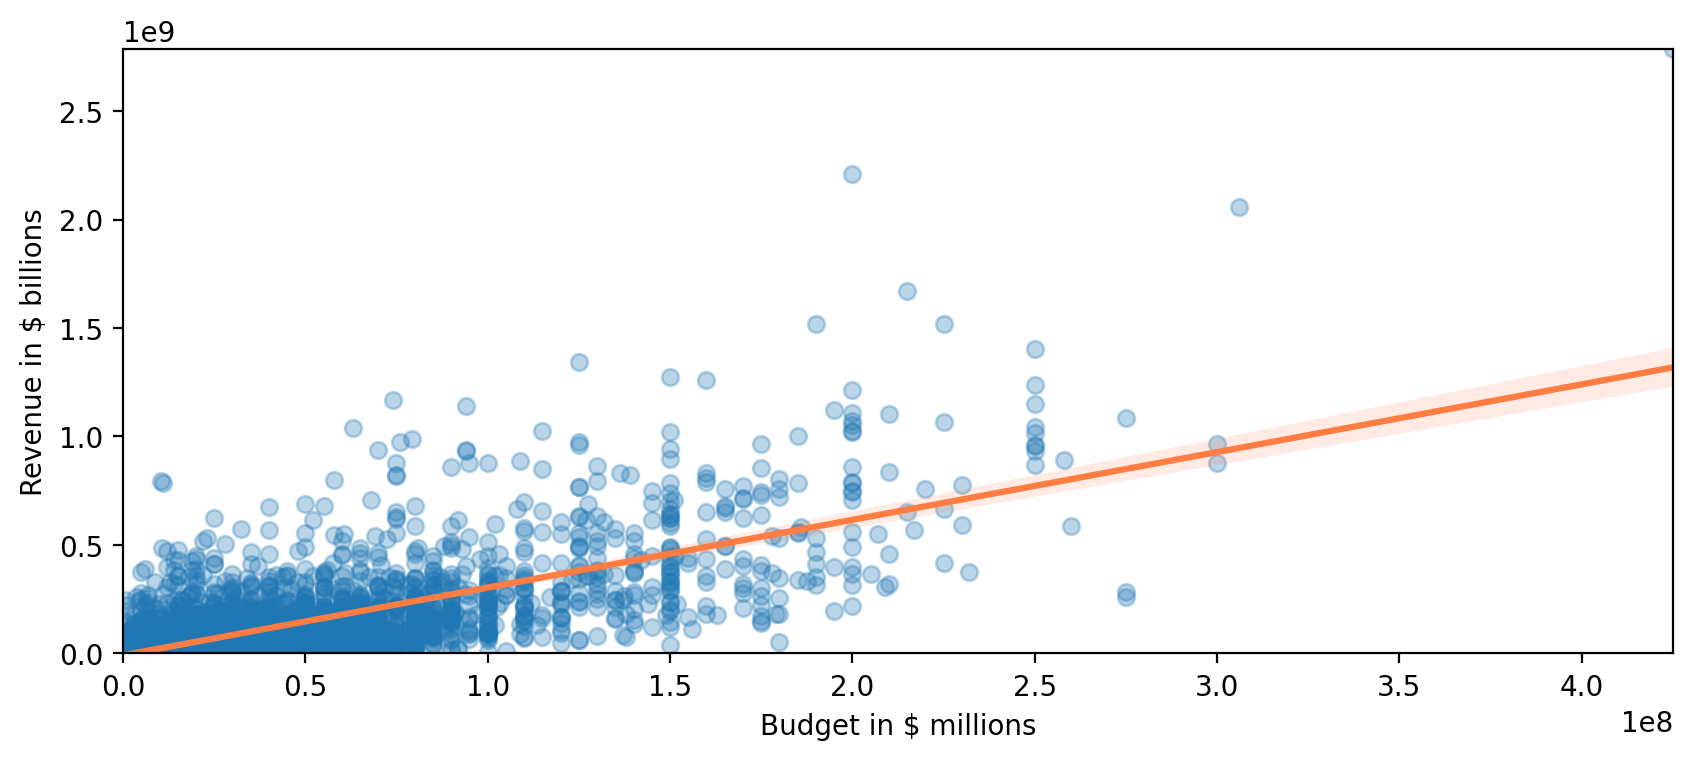

In [48]:
plt.figure(figsize=(10,4), dpi=200)
ax3 = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})
ax3.set(xlim= (0,new_films.USD_Production_Budget.max()),
        ylim= (0,new_films.USD_Worldwide_Gross.max()),
        xlabel= 'Budget in $ millions',
        ylabel= 'Revenue in $ billions')
plt.show()

In [50]:
regression = LinearRegression()

In [53]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [56]:
regression.fit(X, y)
regression.intercept_

array([-8650768.00661027])

In [58]:
regression.coef_

array([[3.12259592]])

In [59]:
regression.score(X, y)

0.5577032617720403

In [60]:
X1 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y1 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [61]:
regression.fit(X1, y1)
regression.intercept_

array([22821538.63508039])

In [62]:
regression.coef_

array([[1.64771314]])

In [63]:
regression.score(X1, y1)

0.02937258620576877

In [73]:
budget = 350000000
prevision = regression.intercept_[0] + regression.coef_[0,0] *budget
round(prevision,2)

599521139.04